ASSIGNMENT  1



ECO319/619 TSAF

Team Members -                             

Archana Yadav 19048

Ojaswee 19211

Rishabh Goswami 19242

Tadavi Yasmin Manavar 19321

Mananv Kundal 19185

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from datetime import datetime 

The rate of inflation based on the consumer price index (CPI). The CPI tracks
the change in retail prices of goods and services which households purchase for
their daily consumption. Data for inflation value is provided at CPI_web .

In [2]:
#importing the datasets
#training datasets
train_df = pd.read_csv(r'/content/CPIndex_Jan14-To-Dec21 - CPIndex_Jan14-To-Dec21.csv')
print (train_df)

    Year      Month      State  Group  Sub Group    Description  Rural  Urban  \
0   2014    January  ALL India    NaN        NaN  Miscellaneous   6.35   6.56   
1   2014   February  ALL India    NaN        NaN  Miscellaneous   6.23   6.42   
2   2014      March  ALL India    NaN        NaN  Miscellaneous   6.41   6.20   
3   2014      April  ALL India    NaN        NaN  Miscellaneous   6.60   5.99   
4   2014        May  ALL India    NaN        NaN  Miscellaneous   6.68   6.48   
..   ...        ...        ...    ...        ...            ...    ...    ...   
89  2021     August  ALL India    NaN        NaN  Miscellaneous   6.25   6.58   
90  2021  September  ALL India    NaN        NaN  Miscellaneous   6.16   6.70   
91  2021    October  ALL India    NaN        NaN  Miscellaneous   6.60   7.09   
92  2021   November  ALL India    NaN        NaN  Miscellaneous   6.44   7.08   
93  2021   December  ALL India    NaN        NaN  Miscellaneous   6.48   6.91   

    Combined Status  
0    

In [3]:
train_df['Date']= pd.to_datetime(train_df['Month'].astype(str)+train_df['Year'].astype(str),format='%B%Y')

In [4]:
train_df

,Year,Month,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Date
0,2014,January,ALL India,NaN,NaN,Miscellaneous,6.35,6.56,6.45,F,2014-01-01
1,2014,February,ALL India,NaN,NaN,Miscellaneous,6.23,6.42,6.23,F,2014-02-01
2,2014,March,ALL India,NaN,NaN,Miscellaneous,6.41,6.20,6.30,F,2014-03-01
3,2014,April,ALL India,NaN,NaN,Miscellaneous,6.60,5.99,6.39,F,2014-04-01
4,2014,May,ALL India,NaN,NaN,Miscellaneous,6.68,6.48,6.68,F,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...
89,2021,August,ALL India,NaN,NaN,Miscellaneous,6.25,6.58,6.40,F,2021-08-01
90,2021,September,ALL India,NaN,NaN,Miscellaneous,6.16,6.70,6.38,F,2021-09-01
91,2021,October,ALL India,NaN,NaN,Miscellaneous,6.60,7.09,6.83,F,2021-10-01
92,2021,November,ALL India,NaN,NaN,Miscellaneous,6.44,7.08,6.75,F,2021-11-01


For Urban

In [5]:
#Taking only Date and urban Coloumn
new_df_Urban = train_df[['Date', 'Urban']].copy()
new_df_Urban

,Date,Urban
0,2014-01-01,6.56
1,2014-02-01,6.42
2,2014-03-01,6.20
3,2014-04-01,5.99
4,2014-05-01,6.48
...,...,...
89,2021-08-01,6.58
90,2021-09-01,6.70
91,2021-10-01,7.09
92,2021-11-01,7.08


In [6]:
#Saving into seperate CSV file 
new_df_Urban.to_csv('file1.csv', index=False)

In [7]:
#removing the unwanted columns
train_df.drop(['State'], axis = 1)
train_df

,Year,Month,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Date
0,2014,January,ALL India,NaN,NaN,Miscellaneous,6.35,6.56,6.45,F,2014-01-01
1,2014,February,ALL India,NaN,NaN,Miscellaneous,6.23,6.42,6.23,F,2014-02-01
2,2014,March,ALL India,NaN,NaN,Miscellaneous,6.41,6.20,6.30,F,2014-03-01
3,2014,April,ALL India,NaN,NaN,Miscellaneous,6.60,5.99,6.39,F,2014-04-01
4,2014,May,ALL India,NaN,NaN,Miscellaneous,6.68,6.48,6.68,F,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...
89,2021,August,ALL India,NaN,NaN,Miscellaneous,6.25,6.58,6.40,F,2021-08-01
90,2021,September,ALL India,NaN,NaN,Miscellaneous,6.16,6.70,6.38,F,2021-09-01
91,2021,October,ALL India,NaN,NaN,Miscellaneous,6.60,7.09,6.83,F,2021-10-01
92,2021,November,ALL India,NaN,NaN,Miscellaneous,6.44,7.08,6.75,F,2021-11-01


In [8]:
#For date and time
date=[]
#converting date into integer
for i in range(len(train_df)):
    current_date = train_df['Date'][i]
    d = int(current_date.strftime("%Y%m%d"))
    date.append(d)

In [9]:
#inserting the date column
train_df.insert(2, "D", date, True)
train_df

,Year,Month,D,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Date
0,2014,January,20140101,ALL India,NaN,NaN,Miscellaneous,6.35,6.56,6.45,F,2014-01-01
1,2014,February,20140201,ALL India,NaN,NaN,Miscellaneous,6.23,6.42,6.23,F,2014-02-01
2,2014,March,20140301,ALL India,NaN,NaN,Miscellaneous,6.41,6.20,6.30,F,2014-03-01
3,2014,April,20140401,ALL India,NaN,NaN,Miscellaneous,6.60,5.99,6.39,F,2014-04-01
4,2014,May,20140501,ALL India,NaN,NaN,Miscellaneous,6.68,6.48,6.68,F,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
89,2021,August,20210801,ALL India,NaN,NaN,Miscellaneous,6.25,6.58,6.40,F,2021-08-01
90,2021,September,20210901,ALL India,NaN,NaN,Miscellaneous,6.16,6.70,6.38,F,2021-09-01
91,2021,October,20211001,ALL India,NaN,NaN,Miscellaneous,6.60,7.09,6.83,F,2021-10-01
92,2021,November,20211101,ALL India,NaN,NaN,Miscellaneous,6.44,7.08,6.75,F,2021-11-01


In [10]:
#Data Exploraion
#checking for the NULL values
train_df['Rural'].isnull().sum()

0

In [11]:
#checking for the NULL values
train_df['Urban'].isnull().sum()

0

In [12]:
#checking for the NULL values
train_df['Combined'].isnull().sum()

0

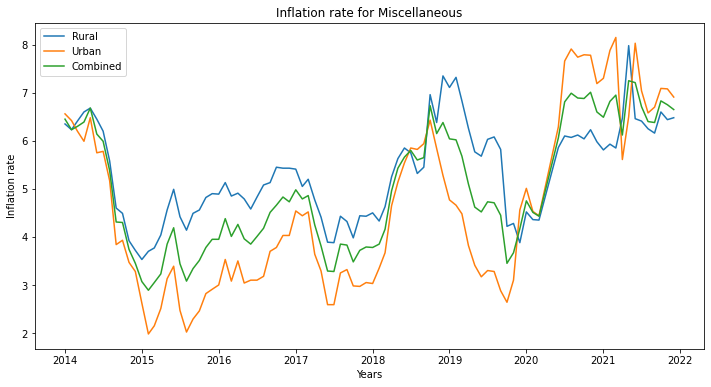

In [13]:
x = train_df['Date']
y = train_df['Rural']
z = train_df['Urban']
k = train_df['Combined']
plt.figure(figsize=(12,6))
plt.plot(x,y,label='Rural')
plt.plot(x,z,label='Urban')
plt.plot(x,k,label='Combined')
plt.ylabel('Inflation rate')
plt.xlabel('Years')
plt.title('Inflation rate for Miscellaneous')
plt.legend()
plt.show()

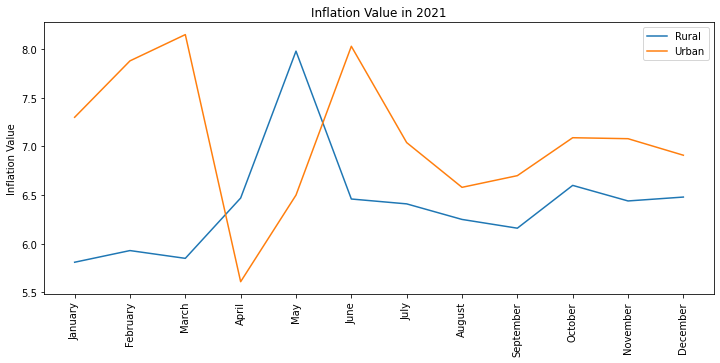

In [14]:
m = []
c = []
r = []
u = []
for i in range(len(train_df)):
  if(train_df['Year'][i]==2021):
    c.append(train_df['Combined'][i])
    r.append(train_df['Rural'][i])
    u.append(train_df['Urban'][i])
    m.append(train_df['Month'][i])

plt.figure(figsize=(12, 5))  
plt.plot(m, r,label = 'Rural')
plt.plot(m , u, label = 'Urban')
#plt.plot(m, c, label='Combined')
plt.xticks(rotation=90)
plt.ylabel("Inflation Value")
plt.title("Inflation Value in 2021")

plt.legend()
plt.show()

Prediction

ARIMA - timeseries forecasting

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class
of models that ‘explains’ a given time series based on its own past values, that is,
its own lags and the lagged forecast errors, so that equation can be used to
forecast future values.ARIMA makes use of lagged moving averages to smooth
time series data. They are widely used in technical analysis to forecast future
security prices.


In [15]:
new_df_Urban

,Date,Urban
0,2014-01-01,6.56
1,2014-02-01,6.42
2,2014-03-01,6.20
3,2014-04-01,5.99
4,2014-05-01,6.48
...,...,...
89,2021-08-01,6.58
90,2021-09-01,6.70
91,2021-10-01,7.09
92,2021-11-01,7.08


In [16]:
# to check whether our data is stationary or not
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('ADF:',dftest[0])
    print('P value:',dftest[1])
    print('Num of lags :',dftest[2])
    print('Num of Observations used for ADF Regr.:',dftest[3])
    print('Critical values:')
    for key, val in dftest[4].items():
        print('\t',key,':',val)
    
    # setting the bar for stationary and non-stationary for better results.
    if dftest[1] <= 0.05:
        print('The data can be used to make model as the p value indicates it is stationary.')
    else :
        print('The data is non stationary and some differencing needs to be done.')

In [17]:
ad_test(new_df_Urban['Urban'])

ADF: -2.0652665726865234
P value: 0.25870841071008677
Num of lags : 4
Num of Observations used for ADF Regr.: 89
Critical values:
	 1% : -3.506057133647011
	 5% : -2.8946066061911946
	 10% : -2.5844100201994697
The data is non stationary and some differencing needs to be done.


In [18]:
new_df_Urban['Urban'].shift(1)

0      NaN
1     6.56
2     6.42
3     6.20
4     5.99
      ... 
89    7.04
90    6.58
91    6.70
92    7.09
93    7.08
Name: Urban, Length: 94, dtype: float64

In [19]:
#performing regular differencing
new_df_Urban['Regular Difference']=new_df_Urban['Urban']-new_df_Urban['Urban'].shift(1)

In [20]:
#shifting the values by 12 units and then subtracting them from previous values
new_df_Urban['Seasonal Difference']=new_df_Urban['Regular Difference']-new_df_Urban['Regular Difference'].shift(12)

In [21]:
new_df_Urban.head(10)

,Date,Urban,Regular Difference,Seasonal Difference
0,2014-01-01,6.56,NaN,NaN
1,2014-02-01,6.42,-0.14,NaN
2,2014-03-01,6.20,-0.22,NaN
3,2014-04-01,5.99,-0.21,NaN
4,2014-05-01,6.48,0.49,NaN
5,2014-06-01,5.75,-0.73,NaN
6,2014-07-01,5.78,0.03,NaN
7,2014-08-01,5.17,-0.61,NaN
8,2014-09-01,3.84,-1.33,NaN
9,2014-10-01,3.93,0.09,NaN


In [22]:
# running fuller test again after differencing to see the change
ad_test(new_df_Urban['Seasonal Difference'].dropna()) 

ADF: -5.533919950679733
P value: 1.7621752711737676e-06
Num of lags : 11
Num of Observations used for ADF Regr.: 69
Critical values:
	 1% : -3.528889992207215
	 5% : -2.9044395987933362
	 10% : -2.589655654274312
The data can be used to make model as the p value indicates it is stationary.


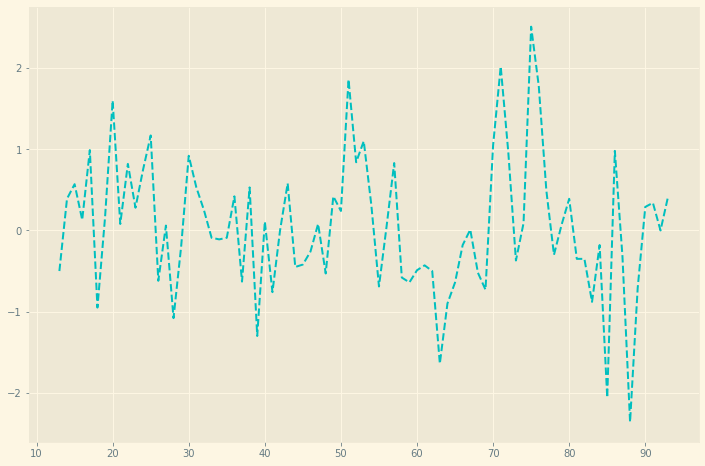

In [23]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,8))
plt.plot(new_df_Urban['Seasonal Difference'],'c--')
plt.show()

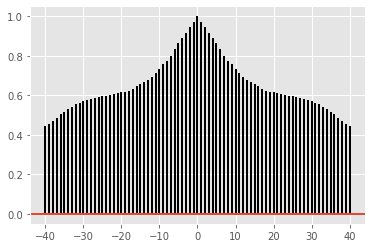

In [24]:
#this plot shows the change of autocorrelation as we change the lag of independent variables 
plt.style.use('ggplot')
plt.acorr(new_df_Urban['Urban'],maxlags=40)
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

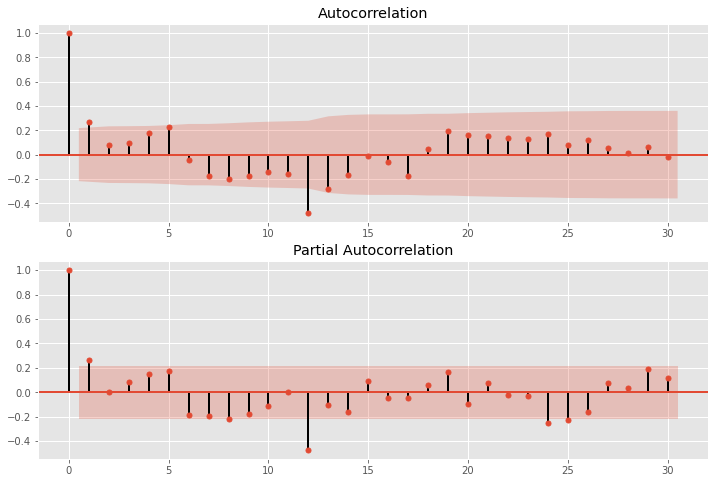

In [27]:
#the p and q values are taken from pacf and acf plots respectively
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df_Urban['Seasonal Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df_Urban['Seasonal Difference'].iloc[13:],lags=30,ax=ax2)

In [30]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to bitcoin dataset
stepwise_fit = auto_arima(new_df_Urban['Urban'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=179.840, Time=1.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=372.727, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=184.861, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=371.843, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=204.482, Time=0.25 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=181.066, Time=1.72 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=181.101, Time=2.10 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=183.506, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=183.044, Time=3.29 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=181.554, Time=1.13 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=181.051, Time=0.83 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 -85.084
Date:                            Sun, 28 Aug 2022   AIC                            178.167
Time:                                    11:59:19   BIC                            187.794
Sample:                                         0   HQIC                           182.032
                                             - 94                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9318      0.044     21.275      0.000       0.846       1.018
ma.L1          0.2502      0.084      2.988      0.003       0.086       0.414
ma.S.L12      -0.7648      0.194     -3.952      0.000      -1.144      -0.386
sigma2         0.4025      0.058      6.993      0.000       0.290       0.515
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                13.64
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.36
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Split data into train / test sets
train = new_df_Urban.iloc[:len(train_df)-12]
test = new_df_Urban.iloc[len(train_df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(2,1,2)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Urban'], 
                order = (2, 1, 2), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Urban   No. Observations:                   82
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                 -63.482
Date:                             Sun, 28 Aug 2022   AIC                            140.963
Time:                                     12:01:00   BIC                            156.602
Sample:                                          0   HQIC                           147.167
                                              - 82                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1618      0.442      2.629      0.009       0.296       2.028
ar.L2         -0.2740      0.401     -0.683      0.494      -1.060       0.512
ma.L1         -0.8326      0.430     -1.937      0.053      -1.675       0.010
ma.L2         -0.0664      0.412     -0.161      0.872      -0.875       0.742
ar.S.L12      -0.9018      0.183     -4.915      0.000      -1.261      -0.542
ar.S.L24      -0.3493      0.170     -2.055      0.040      -0.683      -0.016
sigma2         0.3155      0.059      5.333      0.000       0.200       0.431
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.74   Prob(JB):                         0.69
Heteroskedasticity (H):               0.91   Skew:                             0.24
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

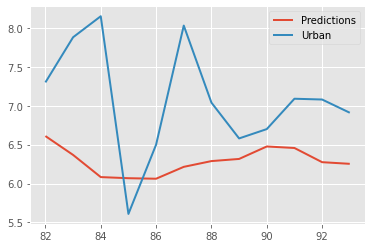

In [32]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Urban'].plot(legend = True)
plt.show()

In [33]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [34]:
# Calculate root mean absolute error
metrics.mean_absolute_error(test["Urban"], predictions)

0.8594164735741483

In [35]:
# Calculate root mean squared error
rmse(test["Urban"], predictions)

1.0365895332020054

In [36]:
# Calculate mean squared error
mean_squared_error(test["Urban"], predictions)

1.0745178603439516

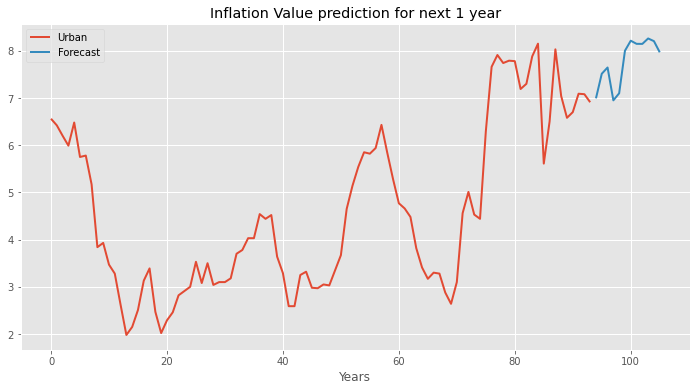

In [37]:
# Training the model on the full dataset
model = model = SARIMAX(new_df_Urban['Urban'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast_urban = result.predict(start = len(new_df_Urban), 
                          end = (len(new_df_Urban)-1) + 1 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plotting the forecasted values
new_df_Urban['Urban'].plot(figsize = (12, 6), legend = True)
forecast_urban.plot(legend = True)

plt.title("Inflation Value prediction for next 1 year")
plt.xlabel("Years")
plt.show()

In [38]:
forecast_urban

94     6.992482
95     7.513059
96     7.645257
97     6.949790
98     7.099366
99     8.000396
100    8.213001
101    8.146769
102    8.145511
103    8.260396
104    8.203535
105    7.967579
Name: Forecast, dtype: float64

In [39]:
p = forecast_urban
df1 = pd.DataFrame(p)
df1.reset_index(inplace=True)

In [40]:
df1.drop(['index'], axis=1)

,Forecast
0,6.992482
1,7.513059
2,7.645257
3,6.949790
4,7.099366
5,8.000396
6,8.213001
7,8.146769
8,8.145511
9,8.260396


In [41]:
month = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1['Months'] = month

In [42]:
df1

,index,Forecast,Months
0,94,6.992482,January
1,95,7.513059,Feburary
2,96,7.645257,March
3,97,6.949790,April
4,98,7.099366,May
5,99,8.000396,June
6,100,8.213001,July
7,101,8.146769,August
8,102,8.145511,September
9,103,8.260396,October


In [43]:
pre = forecast_urban.head(5)
df = pd.DataFrame(pre)
df.reset_index(inplace=True)
df

,index,Forecast
0,94,6.992482
1,95,7.513059
2,96,7.645257
3,97,6.949790
4,98,7.099366


In [44]:
df.drop(['index'], axis=1)

,Forecast
0,6.992482
1,7.513059
2,7.645257
3,6.949790
4,7.099366


In [45]:
actual_df = pd.read_csv(r'/content/CPIndex_Jan22-To-May22 (1) - CPIndex_Jan22-To-May22 (1).csv')
print(actual_df)

   Year     Month      State    Description  Rural  Urban  Combined Status
0  2022   January  ALL India  Miscellaneous   6.32   6.80      6.55      F
1  2022  February  ALL India  Miscellaneous   6.42   6.76      6.58      F
2  2022     March  ALL India  Miscellaneous   6.99   7.07      7.02      F
3  2022     April  ALL India  Miscellaneous   7.72   8.37      8.03      F
4  2022       May  ALL India  Miscellaneous   6.08   7.55      6.82      F


In [46]:
n_df = pd.concat([actual_df['Urban'],df], axis=1)
n_df

,Urban,index,Forecast
0,6.80,94,6.992482
1,6.76,95,7.513059
2,7.07,96,7.645257
3,8.37,97,6.949790
4,7.55,98,7.099366


In [47]:
n_df.columns = ['Actual', 'index', 'Predicted']

In [48]:
n_df.drop(['index'], axis=1)

,Actual,Predicted
0,6.80,6.992482
1,6.76,7.513059
2,7.07,7.645257
3,8.37,6.949790
4,7.55,7.099366


In [49]:
month = ['January', 'Feburary', 'March', 'April', 'May']
n_df['Months'] = month
n_df

,Actual,index,Predicted,Months
0,6.80,94,6.992482,January
1,6.76,95,7.513059,Feburary
2,7.07,96,7.645257,March
3,8.37,97,6.949790,April
4,7.55,98,7.099366,May


In [50]:
#comparing the values of year 2022 predicted and the actual data provided at the website
n_df.drop(['index'], axis=1)

,Actual,Predicted,Months
0,6.80,6.992482,January
1,6.76,7.513059,Feburary
2,7.07,7.645257,March
3,8.37,6.949790,April
4,7.55,7.099366,May


For Rural

In [51]:
new_df_Rural= train_df[['Date', 'Rural']].copy()
new_df_Rural

,Date,Rural
0,2014-01-01,6.35
1,2014-02-01,6.23
2,2014-03-01,6.41
3,2014-04-01,6.60
4,2014-05-01,6.68
...,...,...
89,2021-08-01,6.25
90,2021-09-01,6.16
91,2021-10-01,6.60
92,2021-11-01,6.44


In [52]:
new_df_Rural.to_csv('file2.csv', index=False)

In [53]:
#removing the unwanted columns
train_df.drop(['State'], axis = 1)
train_df

,Year,Month,D,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Date
0,2014,January,20140101,ALL India,NaN,NaN,Miscellaneous,6.35,6.56,6.45,F,2014-01-01
1,2014,February,20140201,ALL India,NaN,NaN,Miscellaneous,6.23,6.42,6.23,F,2014-02-01
2,2014,March,20140301,ALL India,NaN,NaN,Miscellaneous,6.41,6.20,6.30,F,2014-03-01
3,2014,April,20140401,ALL India,NaN,NaN,Miscellaneous,6.60,5.99,6.39,F,2014-04-01
4,2014,May,20140501,ALL India,NaN,NaN,Miscellaneous,6.68,6.48,6.68,F,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
89,2021,August,20210801,ALL India,NaN,NaN,Miscellaneous,6.25,6.58,6.40,F,2021-08-01
90,2021,September,20210901,ALL India,NaN,NaN,Miscellaneous,6.16,6.70,6.38,F,2021-09-01
91,2021,October,20211001,ALL India,NaN,NaN,Miscellaneous,6.60,7.09,6.83,F,2021-10-01
92,2021,November,20211101,ALL India,NaN,NaN,Miscellaneous,6.44,7.08,6.75,F,2021-11-01


In [54]:
#For date and time
date=[]
#converting date into integer
for i in range(len(train_df)):
    current_date = train_df['Date'][i]
    d = int(current_date.strftime("%Y%m%d"))
    date.append(d)

In [55]:
#inserting the date column
train_df.insert(2, "D", date, True)
train_df

,Year,Month,D,D,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Date
0,2014,January,20140101,20140101,ALL India,NaN,NaN,Miscellaneous,6.35,6.56,6.45,F,2014-01-01
1,2014,February,20140201,20140201,ALL India,NaN,NaN,Miscellaneous,6.23,6.42,6.23,F,2014-02-01
2,2014,March,20140301,20140301,ALL India,NaN,NaN,Miscellaneous,6.41,6.20,6.30,F,2014-03-01
3,2014,April,20140401,20140401,ALL India,NaN,NaN,Miscellaneous,6.60,5.99,6.39,F,2014-04-01
4,2014,May,20140501,20140501,ALL India,NaN,NaN,Miscellaneous,6.68,6.48,6.68,F,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2021,August,20210801,20210801,ALL India,NaN,NaN,Miscellaneous,6.25,6.58,6.40,F,2021-08-01
90,2021,September,20210901,20210901,ALL India,NaN,NaN,Miscellaneous,6.16,6.70,6.38,F,2021-09-01
91,2021,October,20211001,20211001,ALL India,NaN,NaN,Miscellaneous,6.60,7.09,6.83,F,2021-10-01
92,2021,November,20211101,20211101,ALL India,NaN,NaN,Miscellaneous,6.44,7.08,6.75,F,2021-11-01


In [56]:
new_df_Rural

,Date,Rural
0,2014-01-01,6.35
1,2014-02-01,6.23
2,2014-03-01,6.41
3,2014-04-01,6.60
4,2014-05-01,6.68
...,...,...
89,2021-08-01,6.25
90,2021-09-01,6.16
91,2021-10-01,6.60
92,2021-11-01,6.44


In [57]:
# to check whether our data is stationary or not
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('ADF:',dftest[0])
    print('P value:',dftest[1])
    print('Num of lags :',dftest[2])
    print('Num of Observations used for ADF Regr.:',dftest[3])
    print('Critical values:')
    for key, val in dftest[4].items():
        print('\t',key,':',val)
    
    # setting the bar for stationary and non-stationary for better results.
    if dftest[1] <= 0.05:
        print('The data can be used to make model as the p value indicates it is stationary.')
    else :
        print('The data is non stationary and some differencing needs to be done.')

In [58]:
ad_test(new_df_Rural['Rural'])

ADF: -1.2287608531977368
P value: 0.6611027954889555
Num of lags : 12
Num of Observations used for ADF Regr.: 81
Critical values:
	 1% : -3.5137900174243235
	 5% : -2.8979433868293945
	 10% : -2.5861907285474777
The data is non stationary and some differencing needs to be done.


In [59]:
new_df_Rural['Rural'].shift(1)

0      NaN
1     6.35
2     6.23
3     6.41
4     6.60
      ... 
89    6.41
90    6.25
91    6.16
92    6.60
93    6.44
Name: Rural, Length: 94, dtype: float64

In [60]:
#performing regular differencing
new_df_Rural['Regular Difference']=new_df_Rural['Rural']-new_df_Rural['Rural'].shift(1)

In [61]:
#shifting the values by 12 units and then subtracting them from previous values
new_df_Rural['Seasonal Difference']=new_df_Rural['Regular Difference']-new_df_Rural['Regular Difference'].shift(12)

In [62]:
new_df_Rural.head(10)

,Date,Rural,Regular Difference,Seasonal Difference
0,2014-01-01,6.35,NaN,NaN
1,2014-02-01,6.23,-0.12,NaN
2,2014-03-01,6.41,0.18,NaN
3,2014-04-01,6.60,0.19,NaN
4,2014-05-01,6.68,0.08,NaN
5,2014-06-01,6.45,-0.23,NaN
6,2014-07-01,6.20,-0.25,NaN
7,2014-08-01,5.58,-0.62,NaN
8,2014-09-01,4.60,-0.98,NaN
9,2014-10-01,4.49,-0.11,NaN


In [63]:
# running fuller test again after differencing to see the change
ad_test(new_df_Rural['Seasonal Difference'].dropna()) 

ADF: -5.184953974729226
P value: 9.435714414745268e-06
Num of lags : 11
Num of Observations used for ADF Regr.: 69
Critical values:
	 1% : -3.528889992207215
	 5% : -2.9044395987933362
	 10% : -2.589655654274312
The data can be used to make model as the p value indicates it is stationary.


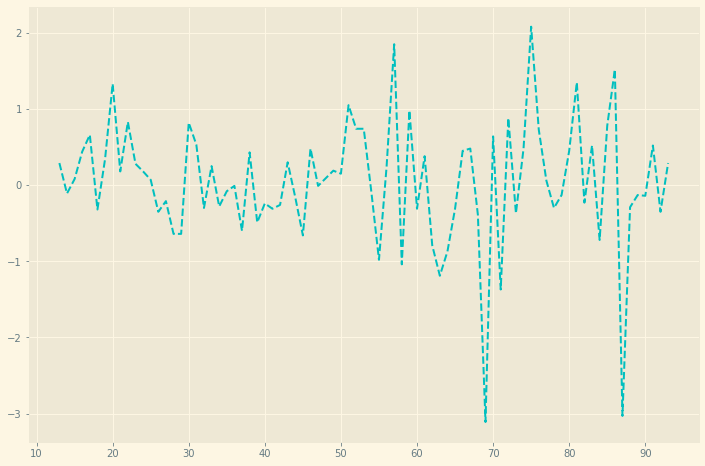

In [64]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,8))
plt.plot(new_df_Rural['Seasonal Difference'],'c--')
plt.show()

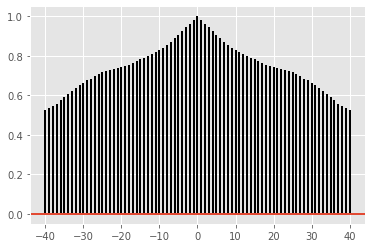

In [65]:
#this plot shows the change of autocorrelation as we change the lag of independent variables 
plt.style.use('ggplot')
plt.acorr(new_df_Rural['Rural'],maxlags=40)
plt.show()

In [66]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

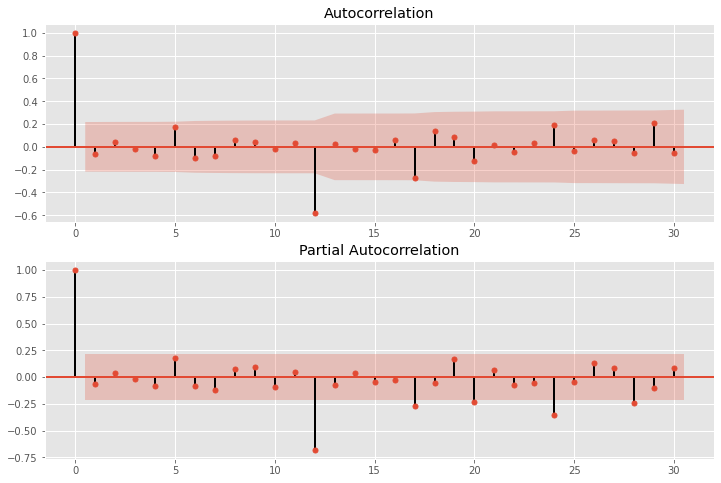

In [67]:
#the p and q values are taken from pacf and acf plots respectively
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df_Rural['Seasonal Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df_Rural['Seasonal Difference'].iloc[13:],lags=30,ax=ax2)

In [69]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to bitcoin dataset
stepwise_fit = auto_arima(new_df_Rural['Rural'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=305.473, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=158.679, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=303.958, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=200.851, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=146.531, Time=0.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=246.757, Time=0.88 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=148.366, Time=2.14 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=148.419, Time=1.71 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=195.562, Time=1.18 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=150.371, Time=2.87 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=145.18

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   94
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -68.590
Date:                            Sun, 28 Aug 2022   AIC                            145.181
Time:                                    12:04:56   BIC                            154.807
Sample:                                         0   HQIC                           149.046
                                             - 94                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8813      0.059     15.023      0.000       0.766       0.996
ar.S.L12      -1.0399      0.111     -9.372      0.000      -1.257      -0.822
ar.S.L24      -0.4657      0.163     -2.860      0.004      -0.785      -0.147
sigma2         0.2588      0.035      7.485      0.000       0.191       0.327
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.02
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               3.20   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
# Split data into train / test sets
train = new_df_Rural.iloc[:len(train_df)-12]
test = new_df_Rural.iloc[len(train_df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(2,1,2)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Rural'], 
                order = (2, 1, 2), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Rural   No. Observations:                   82
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                 -53.184
Date:                             Sun, 28 Aug 2022   AIC                            120.369
Time:                                     12:05:30   BIC                            136.007
Sample:                                          0   HQIC                           126.573
                                              - 82                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8523      0.294     -2.896      0.004      -1.429      -0.275
ar.L2         -0.5896      0.336     -1.753      0.080      -1.249       0.070
ma.L1          0.9214      0.259      3.558      0.000       0.414       1.429
ma.L2          0.8164      0.270      3.022      0.003       0.287       1.346
ar.S.L12      -0.9419      0.135     -6.975      0.000      -1.207      -0.677
ar.S.L24      -0.3805      0.224     -1.699      0.089      -0.819       0.058
sigma2         0.2276      0.041      5.591      0.000       0.148       0.307
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.80
Prob(Q):                              0.91   Prob(JB):                         0.06
Heteroskedasticity (H):               2.18   Skew:                             0.16
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

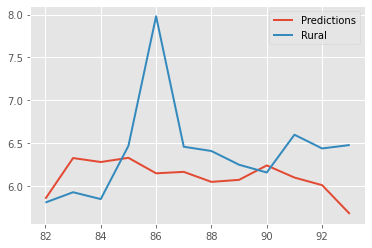

In [72]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Rural'].plot(legend = True)
plt.show()

In [73]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [74]:
# Calculate root mean absolute error
metrics.mean_absolute_error(test["Rural"], predictions)

0.4569223255334449

In [75]:
# Calculate root mean squared error
rmse(test["Rural"], predictions)

0.6482271424996773

In [76]:
# Calculate mean squared error
mean_squared_error(test["Rural"], predictions)

0.42019842827329695

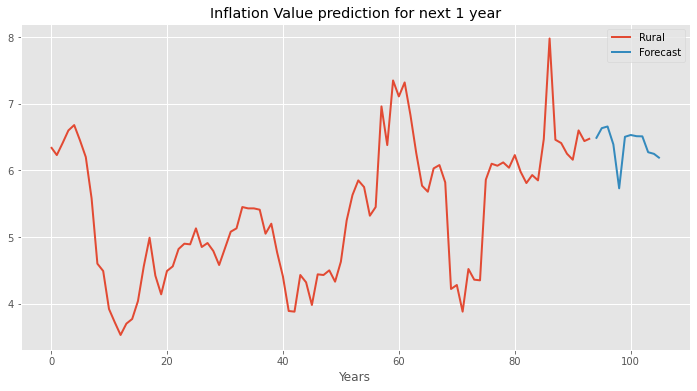

In [77]:
# Training the model on the full dataset
model = model = SARIMAX(new_df_Rural['Rural'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast_rural = result.predict(start = len(new_df_Rural), 
                          end = (len(new_df_Rural)-1) + 1 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plotting the forecasted values
new_df_Rural['Rural'].plot(figsize = (12, 6), legend = True)
forecast_rural.plot(legend = True)

plt.title("Inflation Value prediction for next 1 year")
plt.xlabel("Years")
plt.show()

In [78]:
forecast_rural

94     6.475679
95     6.634066
96     6.658991
97     6.390229
98     5.731013
99     6.504248
100    6.531360
101    6.513166
102    6.510846
103    6.272843
104    6.248509
105    6.182596
Name: Forecast, dtype: float64

In [79]:
p = forecast_rural
df2 = pd.DataFrame(p)
df2.reset_index(inplace=True)

In [80]:
df2.drop(['index'], axis=1)

,Forecast
0,6.475679
1,6.634066
2,6.658991
3,6.390229
4,5.731013
5,6.504248
6,6.531360
7,6.513166
8,6.510846
9,6.272843


In [81]:
month = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2['Months'] = month

In [82]:
df2

,index,Forecast,Months
0,94,6.475679,January
1,95,6.634066,Feburary
2,96,6.658991,March
3,97,6.390229,April
4,98,5.731013,May
5,99,6.504248,June
6,100,6.531360,July
7,101,6.513166,August
8,102,6.510846,September
9,103,6.272843,October


In [83]:
pre = forecast_rural.head(5)
df = pd.DataFrame(pre)
df.reset_index(inplace=True)
df

,index,Forecast
0,94,6.475679
1,95,6.634066
2,96,6.658991
3,97,6.390229
4,98,5.731013


In [84]:
df.drop(['index'], axis=1)

,Forecast
0,6.475679
1,6.634066
2,6.658991
3,6.390229
4,5.731013


In [85]:
actual_df = pd.read_csv(r'/content/CPIndex_Jan22-To-May22 (1) - CPIndex_Jan22-To-May22 (1).csv')
print(actual_df)

   Year     Month      State    Description  Rural  Urban  Combined Status
0  2022   January  ALL India  Miscellaneous   6.32   6.80      6.55      F
1  2022  February  ALL India  Miscellaneous   6.42   6.76      6.58      F
2  2022     March  ALL India  Miscellaneous   6.99   7.07      7.02      F
3  2022     April  ALL India  Miscellaneous   7.72   8.37      8.03      F
4  2022       May  ALL India  Miscellaneous   6.08   7.55      6.82      F


In [86]:
n_df = pd.concat([actual_df['Rural'],df], axis=1)
n_df

,Rural,index,Forecast
0,6.32,94,6.475679
1,6.42,95,6.634066
2,6.99,96,6.658991
3,7.72,97,6.390229
4,6.08,98,5.731013


In [87]:
n_df.columns = ['Actual', 'index', 'Predicted']

In [88]:
n_df.drop(['index'], axis=1)

,Actual,Predicted
0,6.32,6.475679
1,6.42,6.634066
2,6.99,6.658991
3,7.72,6.390229
4,6.08,5.731013


In [89]:
month = ['January', 'Feburary', 'March', 'April', 'May']
n_df['Months'] = month
n_df

,Actual,index,Predicted,Months
0,6.32,94,6.475679,January
1,6.42,95,6.634066,Feburary
2,6.99,96,6.658991,March
3,7.72,97,6.390229,April
4,6.08,98,5.731013,May


In [90]:
#Comparing the values of year 2022 provided at website
n_df.drop(['index'], axis=1)

,Actual,Predicted,Months
0,6.32,6.475679,January
1,6.42,6.634066,Feburary
2,6.99,6.658991,March
3,7.72,6.390229,April
4,6.08,5.731013,May


For Combined

In [91]:
new_df_Combined= train_df[['Date', 'Combined']].copy()
new_df_Combined

,Date,Combined
0,2014-01-01,6.45
1,2014-02-01,6.23
2,2014-03-01,6.30
3,2014-04-01,6.39
4,2014-05-01,6.68
...,...,...
89,2021-08-01,6.40
90,2021-09-01,6.38
91,2021-10-01,6.83
92,2021-11-01,6.75


In [92]:
new_df_Combined.to_csv('file3.csv', index=False)

In [93]:
new_df_Combined

,Date,Combined
0,2014-01-01,6.45
1,2014-02-01,6.23
2,2014-03-01,6.30
3,2014-04-01,6.39
4,2014-05-01,6.68
...,...,...
89,2021-08-01,6.40
90,2021-09-01,6.38
91,2021-10-01,6.83
92,2021-11-01,6.75


In [94]:
ad_test(new_df_Combined['Combined'])

ADF: -1.6035512114734556
P value: 0.4818093506197785
Num of lags : 0
Num of Observations used for ADF Regr.: 93
Critical values:
	 1% : -3.502704609582561
	 5% : -2.8931578098779522
	 10% : -2.583636712914788
The data is non stationary and some differencing needs to be done.


In [95]:
new_df_Combined['Combined'].shift(1)

0      NaN
1     6.45
2     6.23
3     6.30
4     6.39
      ... 
89    6.71
90    6.40
91    6.38
92    6.83
93    6.75
Name: Combined, Length: 94, dtype: float64

In [96]:
#performing regular differencing
new_df_Combined['Regular Difference']=new_df_Combined['Combined']-new_df_Combined['Combined'].shift(1)

In [97]:
#shifting the values by 12 units and then subtracting them from previous values
new_df_Combined['Seasonal Difference']=new_df_Combined['Regular Difference']-new_df_Combined['Regular Difference'].shift(12)

In [98]:
new_df_Combined.head(10)

,Date,Combined,Regular Difference,Seasonal Difference
0,2014-01-01,6.45,NaN,NaN
1,2014-02-01,6.23,-0.22,NaN
2,2014-03-01,6.30,0.07,NaN
3,2014-04-01,6.39,0.09,NaN
4,2014-05-01,6.68,0.29,NaN
5,2014-06-01,6.14,-0.54,NaN
6,2014-07-01,5.99,-0.15,NaN
7,2014-08-01,5.38,-0.61,NaN
8,2014-09-01,4.31,-1.07,NaN
9,2014-10-01,4.30,-0.01,NaN


In [99]:
# running fuller test again after differencing to see the change
ad_test(new_df_Combined['Seasonal Difference'].dropna()) 

ADF: -5.975112072781524
P value: 1.8956060344416632e-07
Num of lags : 11
Num of Observations used for ADF Regr.: 69
Critical values:
	 1% : -3.528889992207215
	 5% : -2.9044395987933362
	 10% : -2.589655654274312
The data can be used to make model as the p value indicates it is stationary.


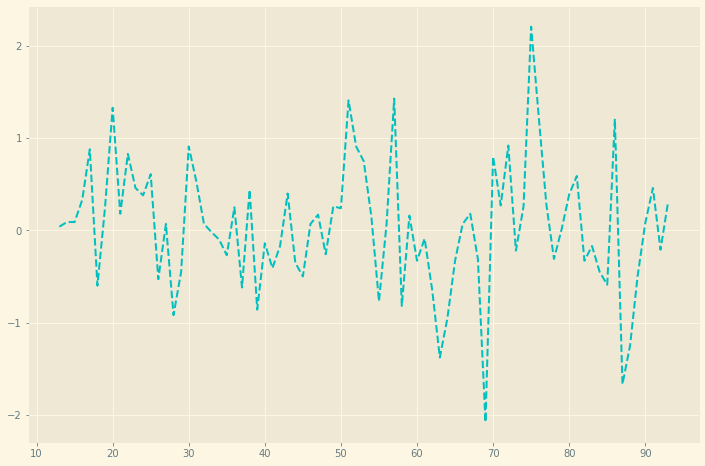

In [100]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,8))
plt.plot(new_df_Combined['Seasonal Difference'],'c--')
plt.show()

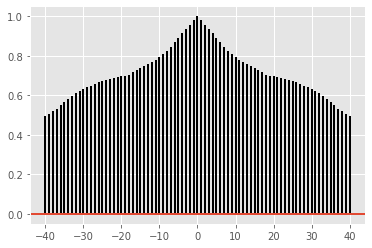

In [101]:
#this plot shows the change of autocorrelation as we change the lag of independent variables 
plt.style.use('ggplot')
plt.acorr(new_df_Combined['Combined'],maxlags=40)
plt.show()

In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

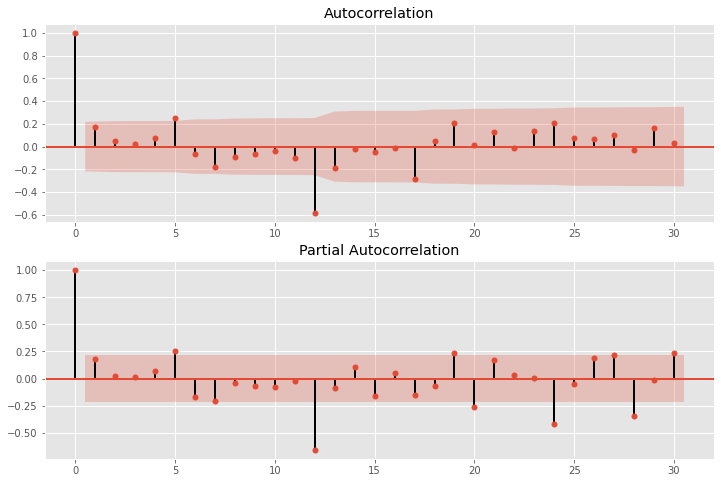

In [104]:
#the p and q values are taken from pacf and acf plots respectively
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_df_Combined['Seasonal Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df_Combined['Seasonal Difference'].iloc[13:],lags=30,ax=ax2)

In [105]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to bitcoin dataset
stepwise_fit = auto_arima(new_df_Combined['Combined'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=326.777, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=141.083, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=325.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=179.903, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=134.929, Time=0.85 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=278.650, Time=0.40 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=135.275, Time=1.02 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=135.559, Time=0.85 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=213.357, Time=0.52 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=136.696, Time=2.06 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=133.06

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   94
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -62.532
Date:                            Sun, 28 Aug 2022   AIC                            133.063
Time:                                    12:06:55   BIC                            142.690
Sample:                                         0   HQIC                           136.928
                                             - 94                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9528      0.036     26.252      0.000       0.882       1.024
ar.S.L12      -0.9214      0.120     -7.670      0.000      -1.157      -0.686
ar.S.L24      -0.3724      0.138     -2.704      0.007      -0.642      -0.102
sigma2         0.2319      0.036      6.513      0.000       0.162       0.302
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.44   Prob(JB):                         0.55
Heteroskedasticity (H):               1.62   Skew:                             0.19
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# Split data into train / test sets
train = new_df_Combined.iloc[:len(train_df)-12]
test = new_df_Combined.iloc[len(train_df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(2,1,2)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Combined'], 
                order = (2, 1, 2), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            Combined   No. Observations:                   82
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                 -49.312
Date:                             Sun, 28 Aug 2022   AIC                            112.624
Time:                                     12:06:58   BIC                            128.263
Sample:                                          0   HQIC                           118.829
                                              - 82                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5042      0.163     -3.093      0.002      -0.824      -0.185
ar.L2         -0.6798      0.178     -3.817      0.000      -1.029      -0.331
ma.L1          0.7342      0.121      6.062      0.000       0.497       0.972
ma.L2          0.9224      0.135      6.856      0.000       0.659       1.186
ar.S.L12      -0.8925      0.150     -5.939      0.000      -1.187      -0.598
ar.S.L24      -0.3120      0.199     -1.566      0.117      -0.702       0.078
sigma2         0.2065      0.036      5.714      0.000       0.136       0.277
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.98   Prob(JB):                         0.33
Heteroskedasticity (H):               1.10   Skew:                             0.24
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

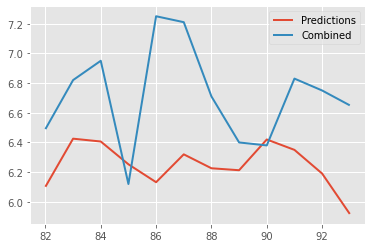

In [107]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Combined'].plot(legend = True)
plt.show()

In [108]:
# Calculate root mean absolute error
metrics.mean_absolute_error(test["Combined"], predictions)

0.4957283846027738

In [109]:
# Calculate root mean squared error
rmse(test["Combined"], predictions)

0.5780797854705535

In [110]:
# Calculate mean squared error
mean_squared_error(test["Combined"], predictions)

0.3341762383696812

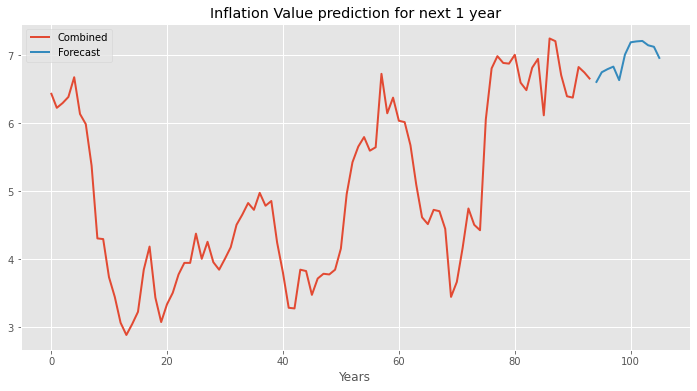

In [111]:
# Training the model on the full dataset
model = model = SARIMAX(new_df_Combined['Combined'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast_combined = result.predict(start = len(new_df_Combined), 
                          end = (len(new_df_Combined)-1) + 1 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plotting the forecasted values
new_df_Combined['Combined'].plot(figsize = (12, 6), legend = True)
forecast_combined.plot(legend = True)

plt.title("Inflation Value prediction for next 1 year")
plt.xlabel("Years")
plt.show()

In [112]:
forecast_combined

94     6.598149
95     6.753527
96     6.798943
97     6.835957
98     6.637221
99     7.012692
100    7.193962
101    7.206770
102    7.213525
103    7.149915
104    7.127451
105    6.950847
Name: Forecast, dtype: float64

In [113]:
p = forecast_combined
df3 = pd.DataFrame(p)
df3.reset_index(inplace=True)

In [114]:
df3.drop(['index'], axis=1)

,Forecast
0,6.598149
1,6.753527
2,6.798943
3,6.835957
4,6.637221
5,7.012692
6,7.193962
7,7.206770
8,7.213525
9,7.149915


In [115]:
month = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df3['Months'] = month

In [116]:
df3

,index,Forecast,Months
0,94,6.598149,January
1,95,6.753527,Feburary
2,96,6.798943,March
3,97,6.835957,April
4,98,6.637221,May
5,99,7.012692,June
6,100,7.193962,July
7,101,7.206770,August
8,102,7.213525,September
9,103,7.149915,October


In [117]:
pre = forecast_combined.head(5)
df = pd.DataFrame(pre)
df.reset_index(inplace=True)
df

,index,Forecast
0,94,6.598149
1,95,6.753527
2,96,6.798943
3,97,6.835957
4,98,6.637221


In [118]:
df.drop(['index'], axis=1)

,Forecast
0,6.598149
1,6.753527
2,6.798943
3,6.835957
4,6.637221


In [119]:
actual_df = pd.read_csv(r'/content/CPIndex_Jan22-To-May22 (1) - CPIndex_Jan22-To-May22 (1).csv')
print(actual_df)

   Year     Month      State    Description  Rural  Urban  Combined Status
0  2022   January  ALL India  Miscellaneous   6.32   6.80      6.55      F
1  2022  February  ALL India  Miscellaneous   6.42   6.76      6.58      F
2  2022     March  ALL India  Miscellaneous   6.99   7.07      7.02      F
3  2022     April  ALL India  Miscellaneous   7.72   8.37      8.03      F
4  2022       May  ALL India  Miscellaneous   6.08   7.55      6.82      F


In [120]:
n_df = pd.concat([actual_df['Combined'],df], axis=1)
n_df

,Combined,index,Forecast
0,6.55,94,6.598149
1,6.58,95,6.753527
2,7.02,96,6.798943
3,8.03,97,6.835957
4,6.82,98,6.637221


In [121]:
n_df.columns = ['Actual', 'index', 'Predicted']

In [122]:
n_df.drop(['index'], axis=1)

,Actual,Predicted
0,6.55,6.598149
1,6.58,6.753527
2,7.02,6.798943
3,8.03,6.835957
4,6.82,6.637221


In [123]:
month = ['January', 'Feburary', 'March', 'April', 'May']
n_df['Months'] = month
n_df

,Actual,index,Predicted,Months
0,6.55,94,6.598149,January
1,6.58,95,6.753527,Feburary
2,7.02,96,6.798943,March
3,8.03,97,6.835957,April
4,6.82,98,6.637221,May


In [124]:
#Comparing the values for 2022 years data provided at the website
n_df.drop(['index'], axis=1)

,Actual,Predicted,Months
0,6.55,6.598149,January
1,6.58,6.753527,Feburary
2,7.02,6.798943,March
3,8.03,6.835957,April
4,6.82,6.637221,May


The pedicted values from models are close enough to actual values as we have taken the data for month apart time period.